## <center>SUPERMARKET LOYALTY <center>

#### The dataset contains records of customers for their last full year of a loyalty program. Analysis on this data was done using Pandas, with visualisations done using Matplotlib

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
loyalty = pd.read_csv("/Users/Oriscsson/Downloads/loyalty.csv")

In [78]:
loyalty.head()

,customer_id,spend,first_month,items_in_first_month,region,loyalty_years,joining_month,promotion
0,1,132.68,15.3,5,Asia/Pacific,5-10,Nov,No
1,2,106.45,16.2,14,Asia/Pacific,0-1,Feb,Yes
2,3,123.16,25.26,7,Middle East/Africa,10+,Dec,Yes
3,4,130.60,24.74,8,Middle East/Africa,3-5,Apr,No
4,5,130.41,25.59,8,Middle East/Africa,3-5,Apr,Yes


In [79]:
loyalty.shape

(1246, 8)

In [80]:
# To get a summary of the dataset, including the number of rows & columns, data type in each column, and null/non-null count
loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           1246 non-null   int64  
 1   spend                 1246 non-null   float64
 2   first_month           1246 non-null   object 
 3   items_in_first_month  1246 non-null   int64  
 4   region                1246 non-null   object 
 5   loyalty_years         1246 non-null   object 
 6   joining_month         1121 non-null   object 
 7   promotion             1246 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 78.0+ KB


## Data cleaning

In [82]:
# To check if any row is duplicated.
loyalty.duplicated().sum()

0

In [83]:
# To see what columns has null values.
loyalty.isnull().sum()[loyalty.isnull().sum() > 0]

joining_month    125
dtype: int64

#### Joining_month has 125 null values. According to data dictionary, these will be replaced by "Unknown"

In [85]:
# Filling the null values in the joining month with "Unknown"
loyalty.joining_month = loyalty.joining_month.fillna("Unknown")

In [86]:
loyalty.joining_month.unique()

array(['Nov', 'Feb', 'Dec', 'Apr', 'May', 'Unknown', 'Jul', 'Oct', 'Jan',
       'Sep', 'Mar', 'Jun', 'Aug'], dtype=object)

In [87]:
# to change the data type of the first_month from object to float/int, in order to perform arithmetic operations.

loyalty.first_month = loyalty.first_month.replace(".", "0") # this could also be resolved using loyalty.first_month.replace(".", "0", inplace = True)
loyalty.first_month = loyalty.first_month.astype("float")

#### In the first_month column, the "." found was replaced by 0 as suggested. Only then was it possible to change the data type in the column to numeric to perform arithmetic operations

In [89]:
# Resolving the case of the values in the Promotion column

loyalty.promotion.unique()

array(['No', 'Yes', 'NO', 'YES'], dtype=object)

In [90]:
# The case was changed to a title case.

loyalty.promotion = loyalty.promotion.replace({"NO":"No", "YES":"Yes"})

In [91]:
loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           1246 non-null   int64  
 1   spend                 1246 non-null   float64
 2   first_month           1246 non-null   float64
 3   items_in_first_month  1246 non-null   int64  
 4   region                1246 non-null   object 
 5   loyalty_years         1246 non-null   object 
 6   joining_month         1246 non-null   object 
 7   promotion             1246 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 78.0+ KB


#### Once data cleaning was completed, a copy of this table was made for exploratory data analysis to generate insightes that will guide the supermarket chain in preparing rewards for shoppers, geared at retaining and possibly attracting new customers

In [93]:
loyalty_df = loyalty.copy()

## Exploratory Data Analysis

### Customer spending

In [96]:
# To get information on the spending behaviour in the supermarket for the full year, including the average, minimum and maximum, etc.
loyalty_df.spend.describe()

count    1246.000000
mean      122.637119
std         9.975102
min       104.290000
25%       112.210000
50%       123.840000
75%       131.092500
max       142.290000
Name: spend, dtype: float64

In [97]:
# To get the 10 top spending customers for the last full year

loyalty_df.groupby('customer_id')['spend'].max().sort_values(ascending = False).nlargest(10)

customer_id
975    142.29
54     142.01
973    141.92
28     141.85
729    141.82
304    141.81
40     141.75
813    141.74
526    141.69
475    141.52
Name: spend, dtype: float64

#### The 10 top spenders at International Essentials spent above $140 in total during the last year. Identifying top spending customers in the calendar year will aid in preparing rewards.

In [99]:
# Checking the correlation between the total spend of each shopper with the amount they spent on the month they subscribed. 
# Also checking if the number of items they bought on subcription month correlates with total spend

(loyalty_df [["spend", "items_in_first_month", "first_month"]]).corr()

,spend,items_in_first_month,first_month
spend,1.000000,-0.085650,0.102563
items_in_first_month,-0.085650,1.000000,-0.103646
first_month,0.102563,-0.103646,1.000000


In [185]:
# To see the top spenders in the first month a customer joined the lotalty program, and how much they spent in the full year
spend_1st_mth = loyalty_df.groupby("customer_id")[["spend", "first_month"]].max().sort_values(by='first_month',ascending=False)[0:11]

# To see the number of items purchased in the first month a customer joined the lotalty program, and how much they spent in the full year
item_1st_mth =loyalty_df.groupby("customer_id")[["spend", "items_in_first_month"]].max().sort_values(by='items_in_first_month',ascending=False)[0:11]

#To show the output of the relationship of total annual spend with the first month spend, and also the number of items purchased in the first month

from IPython.display import HTML
def side_by_side(*dfs):
    html = '<div style="display:flex">'
    for df in dfs:
        html += '<div style="margin-right: 2em">'
        html += df.to_html()
        html += '</div>'
    html += '</div>'
    display(HTML(html))

side_by_side (spend_1st_mth, item_1st_mth)

,spend,first_month
customer_id,,
416,116.30,26.20
1237,130.56,26.18
1225,116.21,26.16
588,134.42,26.14
40,141.75,26.05
699,135.32,25.90
882,134.54,25.85
468,123.29,25.78
898,123.51,25.76


#### There was no meaningful correlation between the amount spent in the first month or the number of items purchased and the total annual spending by a shopper. Several customers who were top spenders when they joined the loyalty program ended up spending less than the average amount recorded in the year. Similarly, some customers who purchased the most items on the month they subscribed to the loyalty program spent less than average.

### Loyalty groups

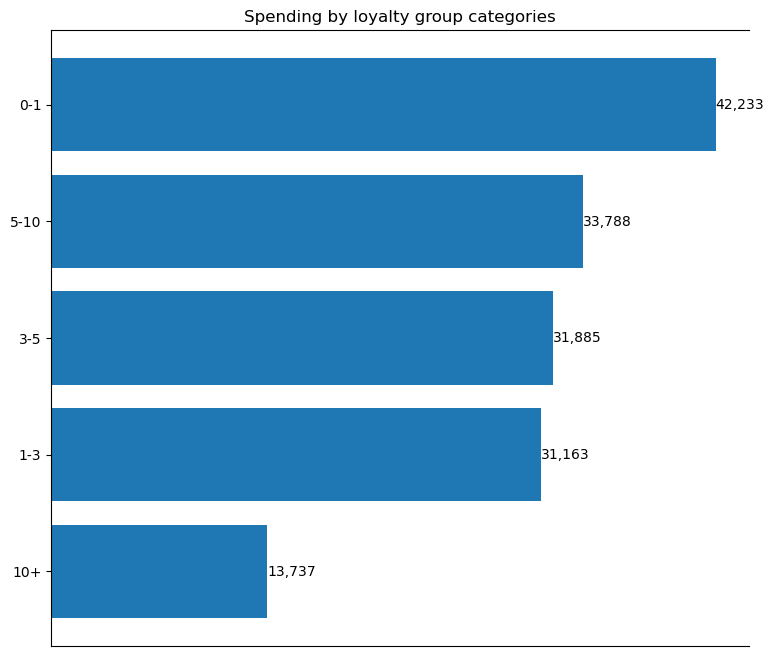

In [103]:
#to determine the total spending based on loyalty groups
sum_cust_loyalty=loyalty_df.groupby('loyalty_years')['spend'].sum().sort_values(ascending = True)

fig,ax = plt.subplots(figsize =(9,8))
bars = ax.barh(sum_cust_loyalty.index, sum_cust_loyalty)
ax.bar_label(bars, labels=[f'{value:,.0f}' for value in sum_cust_loyalty]) #Formatting to show the data labels in the bars
ax.set_xticks(ticks=[])
ax.set_title('Spending by loyalty group categories')
ax.spines['right'].set_visible(False)
plt.show()

#### When combining the spending of shoppers by loyalty group, those who had subscribed for 0-1 years contributed the highest total spending, while shoppers who have been part of the loyalty for over 10 years had the lowest total spending

In [105]:
# spending % of customers in the various loyalty groups

((loyalty_df.groupby('loyalty_years')['spend'].sum().sort_values(ascending = False))/loyalty_df.spend.sum()) *100

loyalty_years
0-1     27.638307
5-10    22.111398
3-5     20.866308
1-3     20.394056
10+      8.989931
Name: spend, dtype: float64

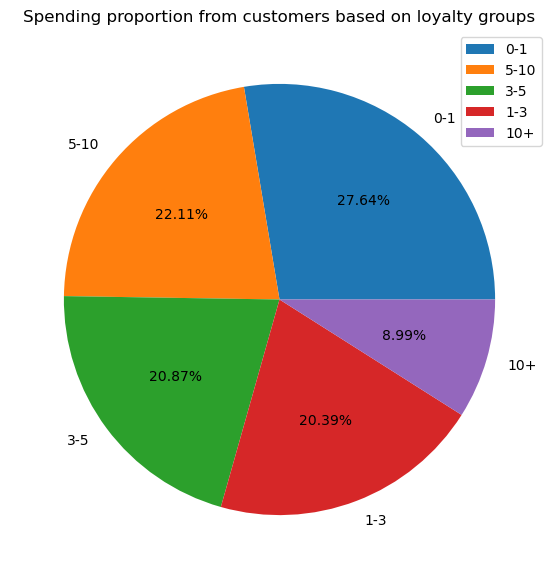

In [106]:
loyalty_percent = loyalty_df.groupby('loyalty_years')['spend'].sum().sort_values(ascending = False)

plt.figure(figsize= (9,7))
plt.pie(loyalty_percent, labels =loyalty_percent.index, autopct = '%1.2f%%')
plt.title("Spending proportion from customers based on loyalty groups")
plt.legend()
plt.show()

In [107]:
# spending % of the most loyal customers, customers in loyalty program for over 5 years

percent5_10 = 22.11        # customers in the 5-10 loyalty group
percent_10_above = 8.99    #customers in the 10+ loyalty group
result = percent5_10 + percent_10_above

print (f"The total % of spending in the 5-10 group was {percent5_10} and {percent_10_above} in the 10+ group")
print (f"Taken together, these groups were the most loyal customers and the total % spend from both groups was {result} %")

The total % of spending in the 5-10 group was 22.11 and 8.99 in the 10+ group
Taken together, these groups were the most loyal customers and the total % spend from both groups was 31.1 %


#### The most loyal shoppers (who had been subscribed in the loyalty group for over 5 years) contributed to 31.1% of the total spending recorded in the last full year

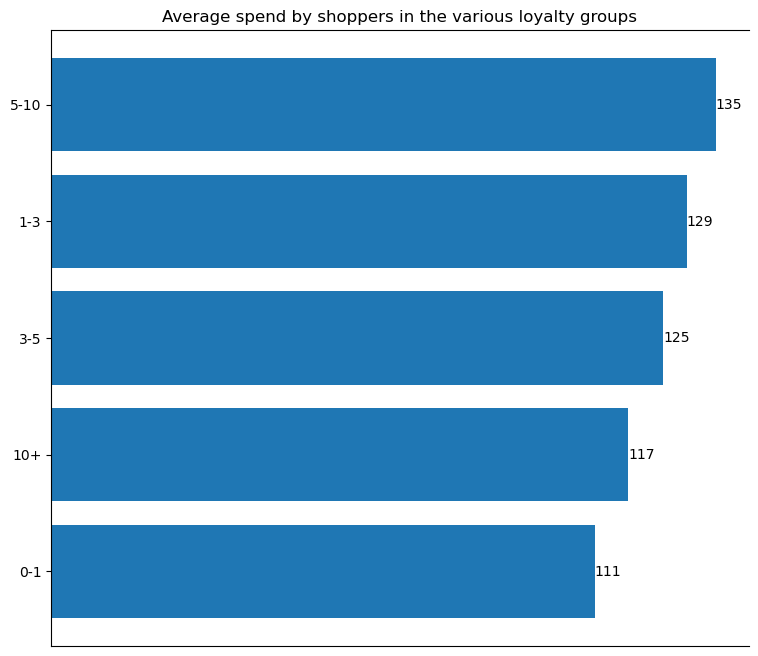

In [109]:
#to determine the average spending based on loyalty groups

avr_cust_loyalty= round(loyalty_df.groupby('loyalty_years')['spend'].mean(),2).sort_values(ascending = True)

fig,ax = plt.subplots(figsize =(9,8))

bars = ax.barh(avr_cust_loyalty.index, avr_cust_loyalty)
ax.bar_label(bars, labels=[f'{value:,.0f}' for value in avr_cust_loyalty]) #Formatting to show the data labels in the bars
ax.set_xticks(ticks=[])
ax.set_title('Average spend by shoppers in the various loyalty groups')
ax.spines['right'].set_visible(False)
plt.show()

#### Looking at the average spending of each shopper in each loyalty group, those subscribed for 5-10 years spent the most. Customers in the 0-1 group spent the least on average

### Regions

In [112]:
# Analyzing by regions
# To see what regions spent the most, and also what region has the most loyal customers (customers who have been subscribed for over 5 years)

regional_spend = loyalty_df.groupby('region')['spend'].sum().sort_values(ascending = True)
regional_spend

region
Asia/Pacific          35813.08
Americas              37683.51
Europe                39214.13
Middle East/Africa    40095.13
Name: spend, dtype: float64

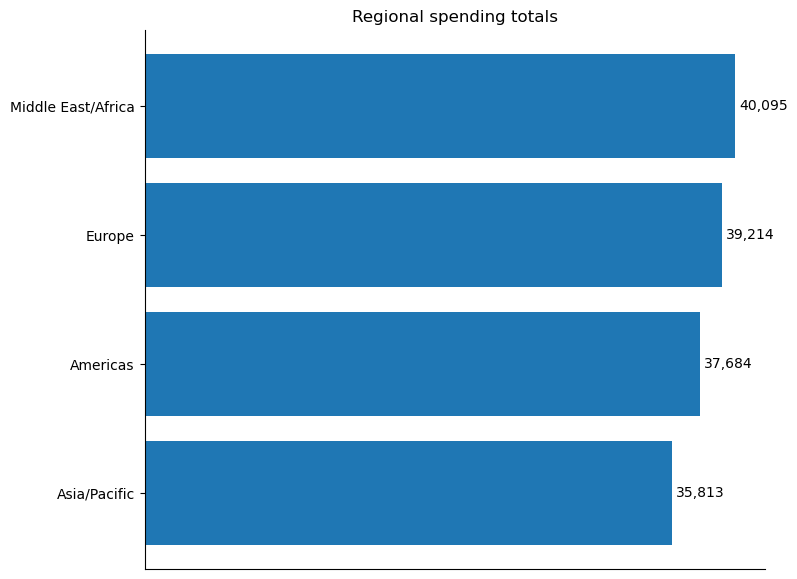

In [113]:
fig, ax = plt.subplots(figsize = (8,7))
bars = ax.barh(regional_spend.index, regional_spend.values)

ax.bar_label(bars, labels=[f'{value:,.0f}' for value in regional_spend], padding=3) #Formatting to show the data labels in the bars
plt.xticks(ticks=[])
ax.set_title("Regional spending totals")

# To take out the borders at the top and left side of the figure, to ensure better visual
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

#### Records show customers in Middle East/Africa collectively spent the highest with around $40,000, while Asia/Pacific, the lowest

In [115]:
# To see the average spending of each customer in the regions
mean_regional_spend = loyalty_df.groupby('region')['spend'].mean().sort_values(ascending = False)
mean_regional_spend

region
Asia/Pacific          123.069003
Middle East/Africa    122.991196
Europe                122.544156
Americas              121.953107
Name: spend, dtype: float64

#### A quick look at the average of each shopper in these regions however showed no different in total spending.

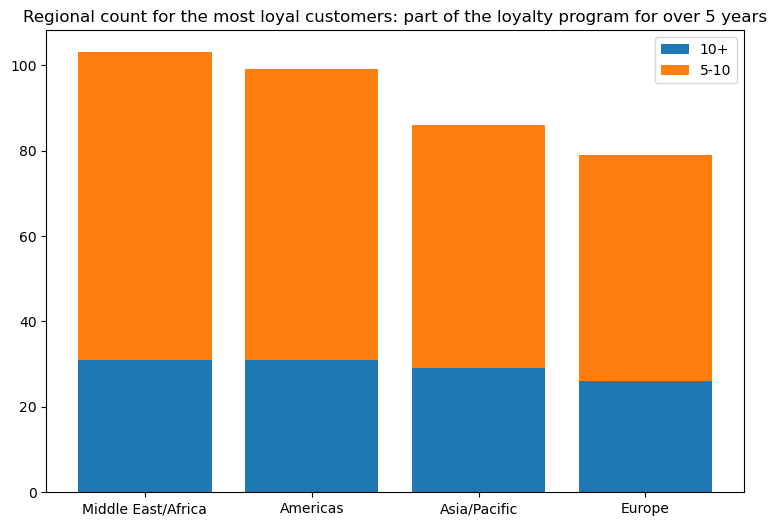

In [117]:
# to get customers with above 10 loyalty years
ya10 = (loyalty_df[loyalty_df['loyalty_years'] == '10+']).region.value_counts()

# to get customers between 5-10 loyalty years
y5_10 = (loyalty_df[loyalty_df['loyalty_years'] == '5-10']).region.value_counts()

#a stacked bar showing the count of customers above 5 in each region
fig, ax = plt.subplots(figsize = (9,6))
ax.bar(ya10.index, ya10.values, label= "10+")
ax.bar(ya10.index, y5_10.values, bottom = ya10, label="5-10")
plt.title("Regional count for the most loyal customers: part of the loyalty program for over 5 years")
plt.legend()
plt.show()

#### Middle East/Africa had the most loyal customers (part of the loyalty program for over 5 years), with Americas regions in second. Although Europe had the least amount of customers part of the program for over 5 years, it ranked second in total regional spending. 

#### Monthly Analysis

In [120]:
# converting the month name to month number to get trend analysis of subcription time with spending

loyalty_df["month_num"] = loyalty_df.loc[:, "joining_month"] 
loyalty_df.groupby("month_num")['spend'].sum().sort_values()

month_num
Dec         5931.93
Nov         9194.20
Jun         9309.22
Mar        10077.05
Sep        11046.78
Aug        11139.84
Apr        11697.23
May        12093.38
Feb        12701.94
Oct        12989.48
Jul        13875.90
Unknown    15466.90
Jan        17282.00
Name: spend, dtype: float64

In [121]:
no_unk = loyalty_df['month_num'] == 'Unknown'

# select all rows except the ones that contain 'unknown'
loyalty_df = loyalty_df[~no_unk]

loyalty_df

,customer_id,spend,first_month,items_in_first_month,region,loyalty_years,joining_month,promotion,month_num
0,1,132.68,15.30,5,Asia/Pacific,5-10,Nov,No,Nov
1,2,106.45,16.20,14,Asia/Pacific,0-1,Feb,Yes,Feb
2,3,123.16,25.26,7,Middle East/Africa,10+,Dec,Yes,Dec
3,4,130.60,24.74,8,Middle East/Africa,3-5,Apr,No,Apr
4,5,130.41,25.59,8,Middle East/Africa,3-5,Apr,Yes,Apr
...,...,...,...,...,...,...,...,...,...
1238,1239,112.12,13.51,13,Europe,10+,Oct,Yes,Oct
1239,1240,130.01,24.97,9,Americas,3-5,Apr,Yes,Apr
1240,1241,131.14,0.00,9,Europe,1-3,Jan,No,Jan
1242,1243,111.85,21.22,9,Asia/Pacific,0-1,Jan,No,Jan


#### Removing the rows with unknown values in the joining month reduced the values from 1246 to 1121

In [123]:
# Dictionary to map month abbreviations to numbers
month_map = ({'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 
             'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12})

# Updating the month_num column to reflect only numbers, needed for a line plot
loyalty_df.loc[:, 'month_num'] = loyalty_df['month_num'].map(lambda month: month_map.get(month, month))
loyalty_df

,customer_id,spend,first_month,items_in_first_month,region,loyalty_years,joining_month,promotion,month_num
0,1,132.68,15.30,5,Asia/Pacific,5-10,Nov,No,11
1,2,106.45,16.20,14,Asia/Pacific,0-1,Feb,Yes,2
2,3,123.16,25.26,7,Middle East/Africa,10+,Dec,Yes,12
3,4,130.60,24.74,8,Middle East/Africa,3-5,Apr,No,4
4,5,130.41,25.59,8,Middle East/Africa,3-5,Apr,Yes,4
...,...,...,...,...,...,...,...,...,...
1238,1239,112.12,13.51,13,Europe,10+,Oct,Yes,10
1239,1240,130.01,24.97,9,Americas,3-5,Apr,Yes,4
1240,1241,131.14,0.00,9,Europe,1-3,Jan,No,1
1242,1243,111.85,21.22,9,Asia/Pacific,0-1,Jan,No,1


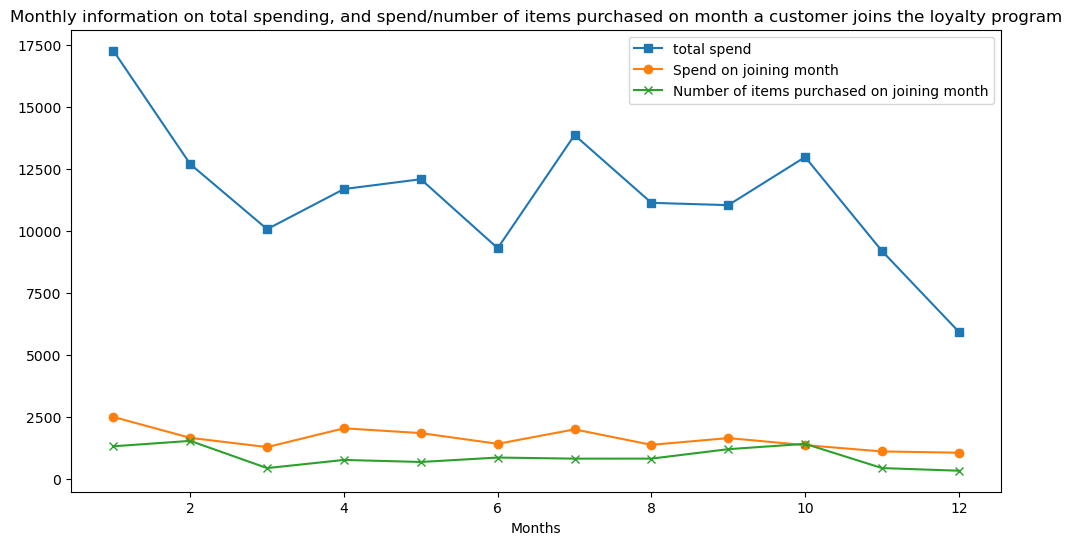

In [124]:
# total spending based on the month shoppers subscribed for the loyalty program 
spend_dates = loyalty_df.groupby('month_num')['spend'].sum()

# spending in the first month shoppers joined the loyalty program
dates_first_month_spend = loyalty_df.groupby('month_num')['first_month'].sum()

# number of items purchased in the first month shoppers joined the loyalty program
dates_items_first_month = loyalty_df.groupby('month_num')["items_in_first_month"].sum()

# Creating a line plot to show the monthly trends on spending, spend on month of subscription and number of items purchased on first month
plt.figure(figsize = (12,6))
plt.plot(spend_dates.index, spend_dates.values, marker = "s")
plt.plot(dates_first_month_spend.index, dates_first_month_spend.values, marker = "o")
plt.plot(dates_items_first_month.index, dates_items_first_month.values, marker = "x")
plt.xlabel("Months")
plt.legend(['total spend','Spend on joining month', "Number of items purchased on joining month"])
plt.title ("Monthly information on total spending, and spend/number of items purchased on month a customer joins the loyalty program")
plt.show()

#### Customers who joined the loyalty program in January contributed the highest spending, whereas those that joined in December recorded the least spending. Between these months, from March to October, the overall spending pattern for shoppers who subscribed to the program showed a slight increase, although some months experienced a decline in spending.

#### The highest spending by customers in their first month of joining the loyalty program occurred in January. Following a drop in February and March, the spending patterns for new subscribers fluctuated until October, ultimately reaching their lowest levels in November and December. Additionally, the number of items purchased by first-time subscribers saw a sharp decline between February and March, then gradually increased throughout the year until October, before experiencing another significant drop in the subsequent months.

In [127]:
# Observations to show spending patterns across months, and how it relates to the loyalty years categories

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
monthly_spend = {}

for month in months:
    filtered_data = loyalty_df[loyalty_df.joining_month == month]
    monthly_spend[month] = filtered_data.groupby('loyalty_years')['spend'].sum().sort_values(ascending=False)

In [128]:
# Storing the grouped monthly spend
monthly_spend_list = []

for month in months:
    filtered_data = loyalty_df[loyalty_df.joining_month == month]
    spend_data = filtered_data.groupby('loyalty_years')['spend'].sum().sort_values(ascending=False)
    spend_data.name = month 
    monthly_spend_list.append(spend_data)

# Combine all the series into a DataFrame
monthly_spend_df = pd.concat(monthly_spend_list, axis=1)

In [129]:
monthly_spend_df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
loyalty_years,,,,,,,,,,,,
0-1,10640.86,5764.39,3769.34,4865.59,2695.07,2226.01,2866.19,1825.05,2356.84,730.84,319.07,231.93
1-3,3940.27,3407.07,3301.88,2025.25,3817.79,1828.13,2596.62,1646.67,1975.38,2104.76,1132.93,269.75
3-5,2031.13,1582.41,1594.39,1825.26,2673.71,2780.64,3510.16,3542.83,2162.01,3104.29,3155.68,1177.58
5-10,550.29,1719.39,1065.29,2118.16,2067.01,1642.20,4079.44,3322.03,2754.19,4808.14,2644.66,2401.39
10+,119.45,228.68,346.15,862.97,839.80,832.24,823.49,803.26,1798.36,2241.45,1941.86,1851.28


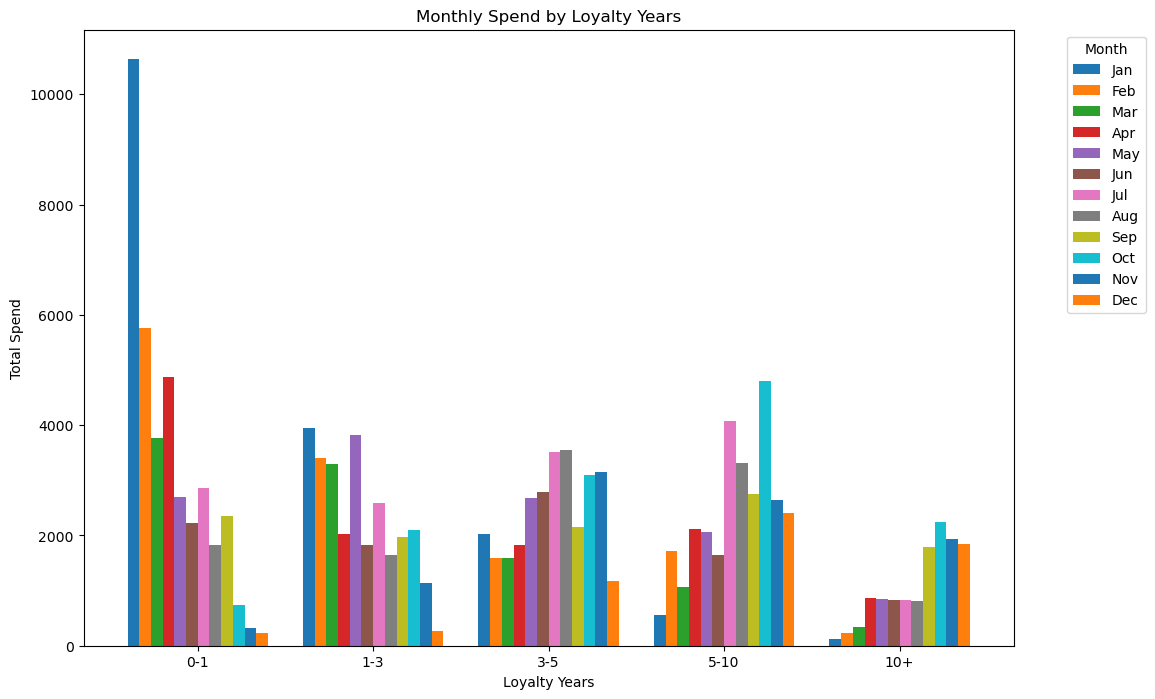

In [130]:
#creating a visual to show the relationship between loyalty group and monthly spend in the data
monthly_spend_df.plot(kind='bar', figsize=(12, 8), width=0.8, rot=0) #rot=0 to show the x-axis label better.
plt.title('Monthly Spend by Loyalty Years')
plt.xlabel('Loyalty Years')
plt.ylabel('Total Spend')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left') # displaying legend outside the box
plt.show()


#### This clustered column chart shows the relationship between spending, loyalty groups and the month the shoppers joined the loyalty program. For shoppers in the 0-1 and 1-3 groups, they often spent the most in the earlier part of the year, with January recording the highest in these groups. For long-term shoppers, who joined the loyalty program for over 5 years, they tended to spend more towards the end of the year.

### Promotion

In [133]:
# the average spend and items purchased in the first month by customers who joined as part of a promotion?

round (loyalty_df.promotion.value_counts(normalize = True) * 100,2)

promotion
No     50.94
Yes    49.06
Name: proportion, dtype: float64

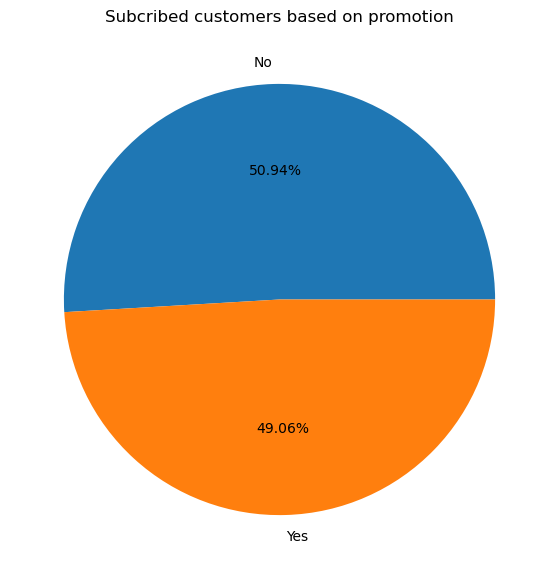

In [134]:
promotion_percent = loyalty_df.promotion.value_counts(normalize = True)

# Creating a visual to see the numver of customers who joined the loyalty program by on-going promotion
plt.figure(figsize= (9,7))
plt.pie(promotion_percent, labels =promotion_percent.index, autopct = '%1.2f%%')
plt.title("Subcribed customers based on promotion")
plt.show()

In [135]:
round(loyalty_df.groupby("promotion")[["spend", "first_month","items_in_first_month"]].mean(),2)

,spend,first_month,items_in_first_month
promotion,,,
No,122.96,16.9,9.4
Yes,122.06,17.4,9.4


#### The number of shoppers who joined the loyalty program with promotion were identical to those who joined independently. Likewise, both groups had similar averages in total spending, first-month spending, and the number of items purchased during their first month.

## Insights

Identifying the top spenders in the last full year can help highlight potentially loyal customers, and providing some extra rewards to such customers will ensure customer engagement, and ultimately long-term loyalty. There is no significant pattern between the number of items purchased and the amount spent by customers on the month they subsribed to the loyalty program with the total amount spent by a customer in the last year at International Essentials. Examining other factors such as loyalty duration, the regions where the supermarkets are located, and the timing of subscriptions to the loyalty program yielded more valuable insights. These insights could help International Essentials prepare for the upcoming year by enhancing rewards, reducing the churn rate of the program, and potentially increasing shopper subscriptions to one or more of the ongoing programs available.

**Loyalty years analysis**

Grouping shoppers spending habits based on how long they had been subscribed to the loyalty program provided some important information. Collectively, shoppers subsribed for less than a year contributed the higest spending in the last year, followed by those who had been subscribed for 5-10 years, with those part of the loyalty program for over 10 years collectivtely contibuting the least amount. This recorded low spending by customers in the 10+ category is expected because only a few shoppers are expetced to have been patronising the supermarkets chain for that long. To accurately understand the relationship between loyalty years and spending, it makes sense to look at the average spending for each category, which gives us an idea of how much each shopper contributed. According to this average, customers who subscribed to the loyalty program for less than a year spent the least, while those in the 5-10 year category spent the most. Additionally, there were no notable differences in the total and average spending patterns among shoppers who had been part of the loyalty program for 1-5 years.


**Regional analysis**

While on average, each shopper in these regions contributed to the same amount of spending in the calendar year, supermarkets in Middle East/Africa saw the highest spending, while those in the Asia/Pacific region recorded the lowest. This might be as a result of more supermarkets in Middle East/Africa. When examining spending from shoppers who had been part of the loyalty program for over 5 years—classified as the most loyal customers, contributing about 31% of total customer spending—most of these customers were found in the Middle East/Africa. Europe had the fewest shoppers in this category, although it had the second-highest total regional spending, suggesting a majority of the shoppers in Europe had been subscribed below 5 years. 


**Monthly analysis**

With a significant number of monthly records missing due to an error in data entry (about 10% of the total records), the true patterns across the year and as such realized insights showing the contribution of the month the shoppers subscribed to the lotalty program to the total spending in the last full year, might be slightly skewed.
  However, based on the exisiting correct records, customers who joined the loyalty program in January recorded the highest amount of total spending, with the lowest values occurring in November and then December, expected since they joined towards the end of the year.  This is not surprising as the customers had fewer months to spend compared to others. Investigating the first month spending and number of items purchased when the shoppers subscribed to the loyalty program, most shoppers spent the most when they subscribed in January. While there was a rapid spike in the number of items purchased in October, it did not reflect on the spending in the same month, and the subsequent months.
  Exploring the relationship between months and loyalty years, it was observed that shoppers part of the loyalty program below 3 years did alot of spending in the earlier months of the year whereas customers who had been in the program for above 5 years had most of their spending in the latter parts of the year. 


**Exisitng promotion analysis**

As observed from the database, several shoppers joined the loyalty program as part of a promotion by International Essentials. However, no significance was observed based on this accounted for only about 49% of the customers, compared to those that joined without the attached promotion offered. The average spend and number of items purchased by shoppers who joined the loyalty program due to promotion was relatively similar to those that joined without the offered promotion. 

## Conclusion

Rewarding shoppers for their annual spending and loyalty to supermarkets is definitely a great way to increase customer engagement/satisfaction, which is often linked with profitability for businesses. The reward system for International Essentials seem to improve as the shoppers remain in the loyalty years for long. Offering additional rewards and promotions in the Middle East/Africa could be crucial, as majority of the most loyal customers, who have been part of the loyalty program for over 5 years are in this region.
 To increase spending towards the end of the year in subsequent years, especially by new to short-term subscribers, the loyalty program could be structured in a way to ensure that shoppers who joined the loyalty program later in the year also have some potential rewards based on other factors asides spending. Lastly, the promotion organised to ensure subscription to the loyalty group did not yield any positive outcome, and this should be revisited as it might provide an opportunity in the long-term to increase the number of shoppers resgistered to the program.
 